In [75]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import simps
import seaborn as sns

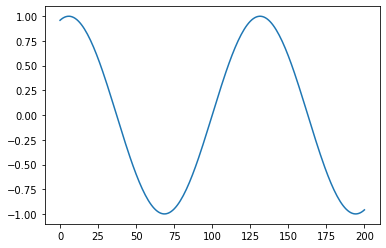

In [76]:
n_grid = 201
xs_lst = np.linspace(-5, 5, n_grid)
ys_lst = np.sin(xs_lst)
plt.plot(ys_lst)

In [77]:
# 1. 计算 dx
dx = np.diff(xs_lst).mean()

# 2. 将二阶导转换为矩阵形式
dia = -2 * np.ones(n_grid)
offdia = np.ones(n_grid - 1)
derivative_x_2 = \
        np.mat( np.diag(dia, 0) + np.diag(offdia, -1) + \
                np.diag(offdia, 1) ) 
derivative_x_2 = derivative_x_2 / np.power(dx, 2)
derivative_x_2 = -derivative_x_2 / 2

# 3. 输出二阶导的矩阵
derivative_x_2

matrix([[ 400., -200.,   -0., ...,   -0.,   -0.,   -0.],
        [-200.,  400., -200., ...,   -0.,   -0.,   -0.],
        [  -0., -200.,  400., ...,   -0.,   -0.,   -0.],
        ...,
        [  -0.,   -0.,   -0., ...,  400., -200.,   -0.],
        [  -0.,   -0.,   -0., ..., -200.,  400., -200.],
        [  -0.,   -0.,   -0., ...,   -0., -200.,  400.]])

In [79]:
eig_vals_non_lst, eig_vecs_non_lst = np.linalg.eigh(
            derivative_x_2)

array([4.83746959e-02, 1.93487083e-01, 4.35302063e-01, 7.73761147e-01,
       1.20878247e+00, 1.74026081e+00, 2.36806762e+00, 3.09205105e+00,
       3.91203599e+00, 4.82782410e+00, 5.83919388e+00, 6.94590071e+00,
       8.14767690e+00, 9.44423177e+00, 1.08352517e+01, 1.23204003e+01,
       1.38993183e+01, 1.55716238e+01, 1.73369124e+01, 1.91947570e+01,
       2.11447083e+01, 2.31862946e+01, 2.53190222e+01, 2.75423752e+01,
       2.98558158e+01, 3.22587844e+01, 3.47506999e+01, 3.73309595e+01,
       3.99989392e+01, 4.27539935e+01, 4.55954562e+01, 4.85226400e+01,
       5.15348368e+01, 5.46313180e+01, 5.78113348e+01, 6.10741180e+01,
       6.44188784e+01, 6.78448069e+01, 7.13510750e+01, 7.49368345e+01,
       7.86012181e+01, 8.23433397e+01, 8.61622939e+01, 9.00571572e+01,
       9.40269874e+01, 9.80708243e+01, 1.02187690e+02, 1.06376588e+02,
       1.10636507e+02, 1.14966414e+02, 1.19365264e+02, 1.23831992e+02,
       1.28365517e+02, 1.32964744e+02, 1.37628559e+02, 1.42355835e+02,
      

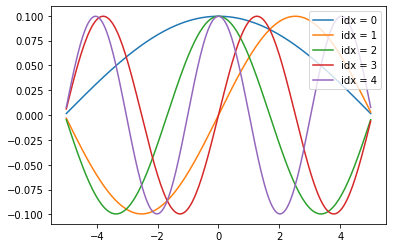

In [68]:
for idx in range(5):
    plt.plot(xs_lst, eig_vecs_non_lst[:, idx],
            label="idx = {}".format(idx))
    plt.legend(loc=1)

In [69]:
x2s_lst = np.diag(np.power(xs_lst, 2), 0)
eig_vals_harm_lst, eig_vecs_harm_lst = \
                np.linalg.eigh(derivative_x_2 + x2s_lst)

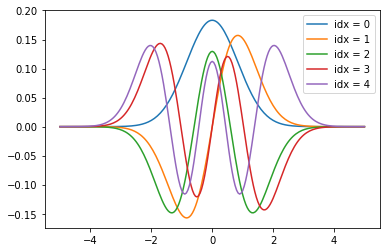

In [70]:
for idx in range(5):
    plt.plot(xs_lst, eig_vecs_harm_lst[:, idx],
            label="idx = {}".format(idx))
    plt.legend(loc=1)

In [141]:
def get_integral(xs_lst, ys_lst, axis=0):
    dx = np.diff(xs_lst).mean()
    return np.sum(ys_lst * dx, axis=axis)



I = get_integral(xs_lst=xs_lst,
            ys_lst=np.power(eig_vecs_non_lst, 2),
            axis=0)


#I = I.tolist()
#I[0]

In [142]:
def get_density(num_electrons, xs_lst, eig_vecs_lst):
    # normalization
    I = get_integral(
                xs_lst=xs_lst,
                ys_lst=np.power(eig_vecs_lst, 2),
                axis=0)

    normed_eig_vecs_lst = ( eig_vecs_lst / np.sqrt(I) )
    print(I.shape)
    print(eig_vecs_lst.shape)
    print(normed_eig_vecs_lst.shape)

    # occupation number
    fn = [2 for _ in range(num_electrons // 2)]
    if num_electrons % 2:
        fn.append(1)

    # density
    res = np.zeros_like(normed_eig_vecs_lst[:, 0])  # res 是列向量
    for ne, psi in zip (fn, normed_eig_vecs_lst.T): # 按照行进行 loop 处理
        res += ne * np.power(psi.T, 2)

    return res

In [1]:
num_electrons = 17
plt.plot(get_density(num_electrons,
                     xs_lst,
                     eig_vecs_non_lst), label="non")
#plt.plot(get_nx(num_electron,psi_harm, x), label="harm")
#plt.plot(get_nx(num_electron,psi_well, x), label="well")
plt.legend(loc=1)

NameError: name 'plt' is not defined